## Instruction

**This notebook analyzes and demonstrates data from 40 replicate runs.**

In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats

print("Pandas version:", pd.__version__)
print('Numpy version:',  np.__version__)
print('Matplotlib version:',  matplotlib.__version__)

Pandas version: 0.24.1
Numpy version: 1.16.5
Matplotlib version: 3.1.2


## base

In [2]:
sub_base = pd.read_csv('Sub_base.csv',index_col=0)
sub_base.head()

20201      20202      20203      20204      20205      20206  \
0  3445584.0  3445584.0  3445584.0  3445584.0  3445584.0  3445584.0   
1  3445634.5  3445627.5  3445627.5  3445631.5  3445622.5  3445630.5   
2  3445597.8  3445602.8  3445590.8  3445604.5  3445605.0  3445622.5   
3  3445488.0  3445517.2  3445496.8  3445505.8  3445531.8  3445583.8   
4  3445289.0  3445350.0  3445310.0  3445326.8  3445402.0  3445465.8   

       20207      20208      20209     202010  ...     202031     202032  \
0  3445584.0  3445584.0  3445584.0  3445584.0  ...  3445584.0  3445584.0   
1  3445639.2  3445645.2  3445633.5  3445621.5  ...  3445627.5  3445626.5   
2  3445623.0  3445623.5  3445603.8  3445576.0  ...  3445616.8  3445603.5   
3  3445558.8  3445551.2  3445516.0  3445475.2  ...  3445551.0  3445523.8   
4  3445426.0  3445404.5  3445356.5  3445283.2  ...  3445421.2  3445378.2   

      202033     202034     202035     202036     202037     202038  \
0  3445584.0  3445584.0  3445584.0  3445584.0  3445584.0  3445584.0   
1  3445625.5  3445618.8  3445633.2  3445642.2  3445634.5  3445626.5   
2  3445605.5  3445601.2  3445606.2  3445612.5  3445619.0  3445615.8   
3  3445533.2  3445540.5  3445517.0  3445544.2  3445558.2  3445564.5   
4  3445379.8  3445427.2  3445342.2  3445392.0  3445429.2  3445447.5   

      202039     202040  
0  3445584.0  3445584.0  
1  3445628.5  3445637.5  
2  3445609.2  3445596.2  
3  3445540.0  3445497.0  
4  3445392.0  3445296.0  

[5 rows x 40 columns]

In [3]:
sub_base = sub_base/10000
sub_base.head()

20201      20202      20203      20204      20205      20206  \
0  344.55840  344.55840  344.55840  344.55840  344.55840  344.55840   
1  344.56345  344.56275  344.56275  344.56315  344.56225  344.56305   
2  344.55978  344.56028  344.55908  344.56045  344.56050  344.56225   
3  344.54880  344.55172  344.54968  344.55058  344.55318  344.55838   
4  344.52890  344.53500  344.53100  344.53268  344.54020  344.54658   

       20207      20208      20209     202010  ...     202031     202032  \
0  344.55840  344.55840  344.55840  344.55840  ...  344.55840  344.55840   
1  344.56392  344.56452  344.56335  344.56215  ...  344.56275  344.56265   
2  344.56230  344.56235  344.56038  344.55760  ...  344.56168  344.56035   
3  344.55588  344.55512  344.55160  344.54752  ...  344.55510  344.55238   
4  344.54260  344.54045  344.53565  344.52832  ...  344.54212  344.53782   

      202033     202034     202035     202036     202037     202038  \
0  344.55840  344.55840  344.55840  344.55840  344.55840  344.55840   
1  344.56255  344.56188  344.56332  344.56422  344.56345  344.56265   
2  344.56055  344.56012  344.56062  344.56125  344.56190  344.56158   
3  344.55332  344.55405  344.55170  344.55442  344.55582  344.55645   
4  344.53798  344.54272  344.53422  344.53920  344.54292  344.54475   

      202039     202040  
0  344.55840  344.55840  
1  344.56285  344.56375  
2  344.56092  344.55962  
3  344.55400  344.54970  
4  344.53920  344.52960  

[5 rows x 40 columns]

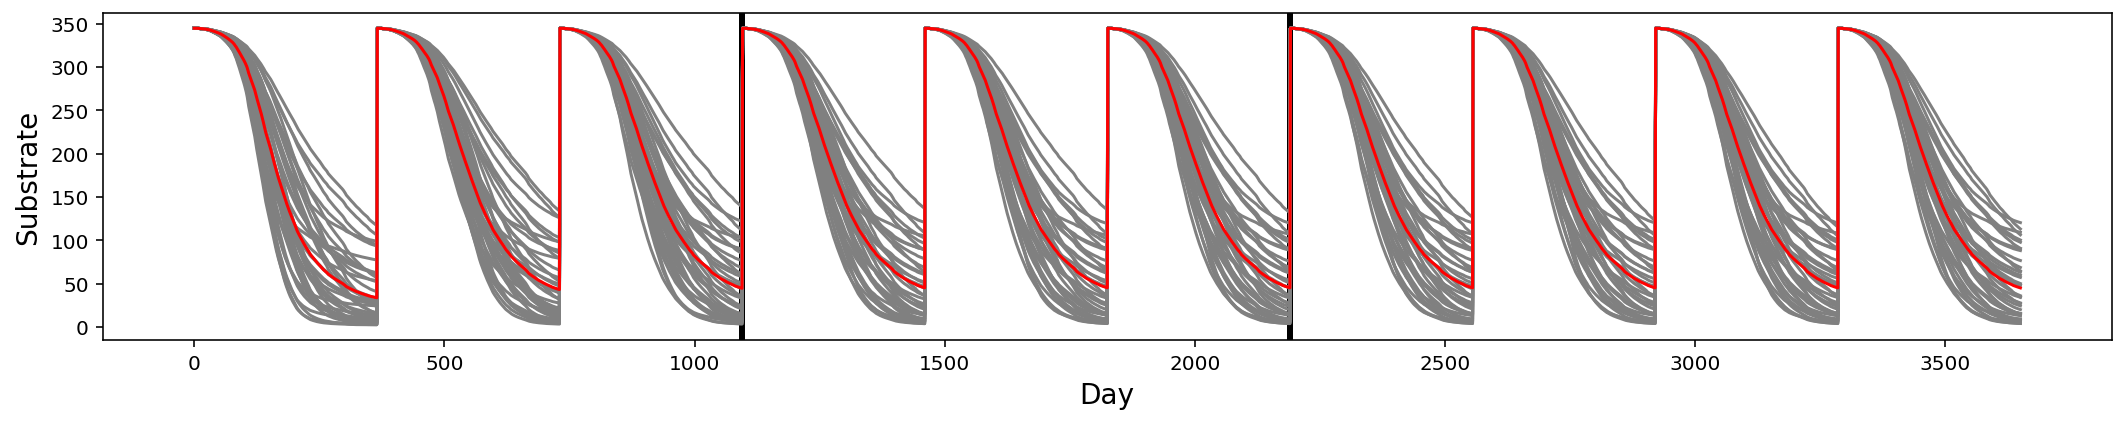

In [4]:
fig,ax = plt.subplots(1,1,figsize=(18,3))
ax.set_xlabel('Day',size=14)
ax.set_ylabel('Substrate',size=14)
ax.axvline(x=365*3, color='k',linestyle='-',lw=3)
ax.axvline(x=365*6, color='k',linestyle='-',lw=3)

for replicate in range(sub_base.shape[1]):
    ax.plot(sub_base.iloc[:,replicate],color='grey')
ax.plot(sub_base.mean(axis=1),color='red')

plt.show()

## basex2

In [5]:
sub_basex2 = pd.read_csv('Sub_basex2.csv',index_col=0)
sub_basex2.head()

20201      20202      20203      20204      20205      20206  \
0  3445584.0  3445584.0  3445584.0  3445584.0  3445584.0  3445584.0   
1  3445634.5  3445627.5  3445627.5  3445631.5  3445622.5  3445630.5   
2  3445597.8  3445602.8  3445590.8  3445604.5  3445605.0  3445622.5   
3  3445488.0  3445517.2  3445496.8  3445505.8  3445531.8  3445583.8   
4  3445289.0  3445350.0  3445310.0  3445326.8  3445402.0  3445465.8   

       20207      20208      20209     202010  ...     202031     202032  \
0  3445584.0  3445584.0  3445584.0  3445584.0  ...  3445584.0  3445584.0   
1  3445639.2  3445645.2  3445633.5  3445621.5  ...  3445627.5  3445626.5   
2  3445623.0  3445623.5  3445603.8  3445576.0  ...  3445616.8  3445603.5   
3  3445558.8  3445551.2  3445516.0  3445475.2  ...  3445551.0  3445523.8   
4  3445426.0  3445404.5  3445356.5  3445283.2  ...  3445421.2  3445378.2   

      202033     202034     202035     202036     202037     202038  \
0  3445584.0  3445584.0  3445584.0  3445584.0  3445584.0  3445584.0   
1  3445625.5  3445618.8  3445633.2  3445642.2  3445634.5  3445626.5   
2  3445605.5  3445601.2  3445606.2  3445612.5  3445619.0  3445615.8   
3  3445533.2  3445540.5  3445517.0  3445544.2  3445558.2  3445564.5   
4  3445379.8  3445427.2  3445342.2  3445392.0  3445429.2  3445447.5   

      202039     202040  
0  3445584.0  3445584.0  
1  3445628.5  3445637.5  
2  3445609.2  3445596.2  
3  3445540.0  3445497.0  
4  3445392.0  3445296.0  

[5 rows x 40 columns]

In [6]:
sub_basex2 = sub_basex2/10000
sub_basex2.head()

20201      20202      20203      20204      20205      20206  \
0  344.55840  344.55840  344.55840  344.55840  344.55840  344.55840   
1  344.56345  344.56275  344.56275  344.56315  344.56225  344.56305   
2  344.55978  344.56028  344.55908  344.56045  344.56050  344.56225   
3  344.54880  344.55172  344.54968  344.55058  344.55318  344.55838   
4  344.52890  344.53500  344.53100  344.53268  344.54020  344.54658   

       20207      20208      20209     202010  ...     202031     202032  \
0  344.55840  344.55840  344.55840  344.55840  ...  344.55840  344.55840   
1  344.56392  344.56452  344.56335  344.56215  ...  344.56275  344.56265   
2  344.56230  344.56235  344.56038  344.55760  ...  344.56168  344.56035   
3  344.55588  344.55512  344.55160  344.54752  ...  344.55510  344.55238   
4  344.54260  344.54045  344.53565  344.52832  ...  344.54212  344.53782   

      202033     202034     202035     202036     202037     202038  \
0  344.55840  344.55840  344.55840  344.55840  344.55840  344.55840   
1  344.56255  344.56188  344.56332  344.56422  344.56345  344.56265   
2  344.56055  344.56012  344.56062  344.56125  344.56190  344.56158   
3  344.55332  344.55405  344.55170  344.55442  344.55582  344.55645   
4  344.53798  344.54272  344.53422  344.53920  344.54292  344.54475   

      202039     202040  
0  344.55840  344.55840  
1  344.56285  344.56375  
2  344.56092  344.55962  
3  344.55400  344.54970  
4  344.53920  344.52960  

[5 rows x 40 columns]

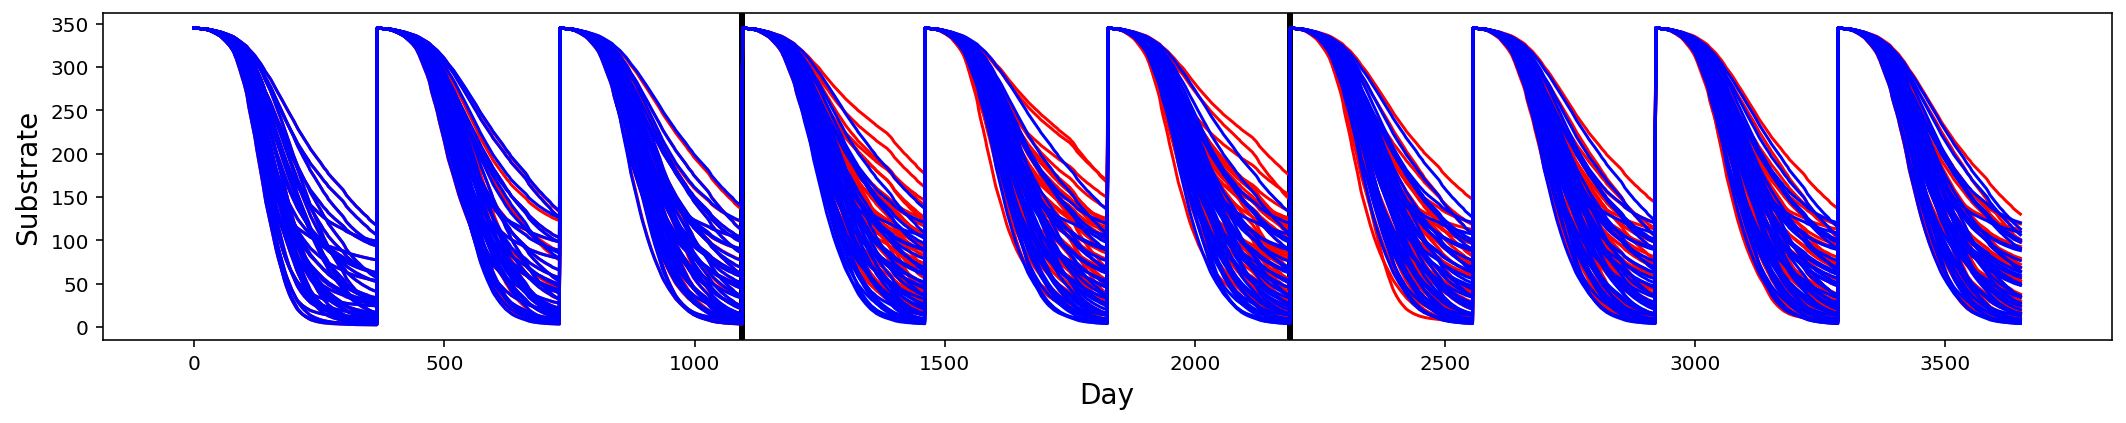

In [7]:
fig,ax = plt.subplots(1,1,figsize=(18,3))
ax.set_xlabel('Day',size=14)
ax.set_ylabel('Substrate',size=14)
ax.axvline(x=365*3, color='k',linestyle='-',lw=3)
ax.axvline(x=365*6, color='k',linestyle='-',lw=3)

for replicate in range(sub_basex2.shape[1]):
    ax.plot(sub_basex2.iloc[:,replicate],color='red')
#ax.plot(sub_basex2.mean(axis=1),color='red')

#base scenario
for replicate in range(sub_base.shape[1]):
    ax.plot(sub_base.iloc[:,replicate],color='blue')
#ax.plot(sub_base.mean(axis=1),color='red')

plt.show()

## basex10

In [8]:
sub_basex10 = pd.read_csv('Sub_basex10.csv',index_col=0)
sub_basex10.head()

20201      20202      20203      20204      20205      20206  \
0  3445584.0  3445584.0  3445584.0  3445584.0  3445584.0  3445584.0   
1  3445634.5  3445627.5  3445627.5  3445631.5  3445622.5  3445630.5   
2  3445597.8  3445602.8  3445590.8  3445604.5  3445605.0  3445622.5   
3  3445488.0  3445517.2  3445496.8  3445505.8  3445531.8  3445583.8   
4  3445289.0  3445350.0  3445310.0  3445326.8  3445402.0  3445465.8   

       20207      20208      20209     202010  ...     202031     202032  \
0  3445584.0  3445584.0  3445584.0  3445584.0  ...  3445584.0  3445584.0   
1  3445639.2  3445645.2  3445633.5  3445621.5  ...  3445627.5  3445626.5   
2  3445623.0  3445623.5  3445603.8  3445576.0  ...  3445616.8  3445603.5   
3  3445558.8  3445551.2  3445516.0  3445475.2  ...  3445551.0  3445523.8   
4  3445426.0  3445404.5  3445356.5  3445283.2  ...  3445421.2  3445378.2   

      202033     202034     202035     202036     202037     202038  \
0  3445584.0  3445584.0  3445584.0  3445584.0  3445584.0  3445584.0   
1  3445625.5  3445618.8  3445633.2  3445642.2  3445634.5  3445626.5   
2  3445605.5  3445601.2  3445606.2  3445612.5  3445619.0  3445615.8   
3  3445533.2  3445540.5  3445517.0  3445544.2  3445558.2  3445564.5   
4  3445379.8  3445427.2  3445342.2  3445392.0  3445429.2  3445447.5   

      202039     202040  
0  3445584.0  3445584.0  
1  3445628.5  3445637.5  
2  3445609.2  3445596.2  
3  3445540.0  3445497.0  
4  3445392.0  3445296.0  

[5 rows x 40 columns]

In [9]:
sub_basex10 = sub_basex10/10000
sub_basex10.head()

20201      20202      20203      20204      20205      20206  \
0  344.55840  344.55840  344.55840  344.55840  344.55840  344.55840   
1  344.56345  344.56275  344.56275  344.56315  344.56225  344.56305   
2  344.55978  344.56028  344.55908  344.56045  344.56050  344.56225   
3  344.54880  344.55172  344.54968  344.55058  344.55318  344.55838   
4  344.52890  344.53500  344.53100  344.53268  344.54020  344.54658   

       20207      20208      20209     202010  ...     202031     202032  \
0  344.55840  344.55840  344.55840  344.55840  ...  344.55840  344.55840   
1  344.56392  344.56452  344.56335  344.56215  ...  344.56275  344.56265   
2  344.56230  344.56235  344.56038  344.55760  ...  344.56168  344.56035   
3  344.55588  344.55512  344.55160  344.54752  ...  344.55510  344.55238   
4  344.54260  344.54045  344.53565  344.52832  ...  344.54212  344.53782   

      202033     202034     202035     202036     202037     202038  \
0  344.55840  344.55840  344.55840  344.55840  344.55840  344.55840   
1  344.56255  344.56188  344.56332  344.56422  344.56345  344.56265   
2  344.56055  344.56012  344.56062  344.56125  344.56190  344.56158   
3  344.55332  344.55405  344.55170  344.55442  344.55582  344.55645   
4  344.53798  344.54272  344.53422  344.53920  344.54292  344.54475   

      202039     202040  
0  344.55840  344.55840  
1  344.56285  344.56375  
2  344.56092  344.55962  
3  344.55400  344.54970  
4  344.53920  344.52960  

[5 rows x 40 columns]

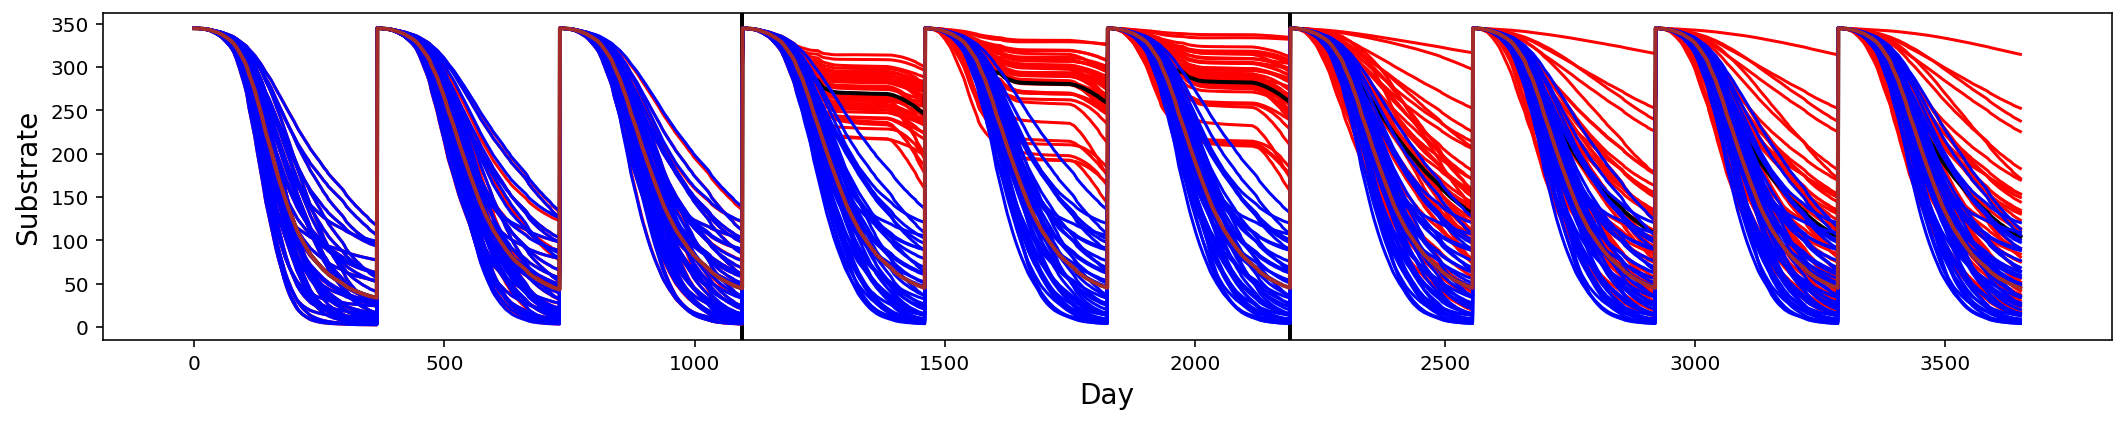

In [10]:
fig,ax = plt.subplots(1,1,figsize=(18,3))
ax.set_xlabel('Day',size=14)
ax.set_ylabel('Substrate',size=14)
ax.axvline(x=365*3, color='k',linestyle='-',lw=2)
ax.axvline(x=365*6, color='k',linestyle='-',lw=2)

for replicate in range(sub_basex10.shape[1]):
    ax.plot(sub_basex10.iloc[:,replicate],color='red')
ax.plot(sub_basex10.mean(axis=1),color='black',lw=2)

#base
for replicate in range(sub_base.shape[1]):
    ax.plot(sub_base.iloc[:,replicate],color='blue')
ax.plot(sub_base.mean(axis=1),color='brown',lw=2)

plt.show()

## basex10_dis

In [11]:
sub_basex10_dis = pd.read_csv('Sub_basex10_dis.csv',index_col=0)
sub_basex10_dis.head()

20201      20202      20203      20204      20205      20206  \
0  3445584.0  3445584.0  3445584.0  3445584.0  3445584.0  3445584.0   
1  3445634.5  3445627.5  3445627.5  3445631.5  3445622.5  3445630.5   
2  3445597.8  3445602.8  3445590.8  3445604.5  3445605.0  3445622.5   
3  3445488.0  3445517.2  3445496.8  3445505.8  3445531.8  3445583.8   
4  3445289.0  3445350.0  3445310.0  3445326.8  3445402.0  3445465.8   

       20208      20209     202010     202011  ...     202031     202032  \
0  3445584.0  3445584.0  3445584.0  3445584.0  ...  3445584.0  3445584.0   
1  3445645.2  3445633.5  3445621.5  3445624.5  ...  3445627.5  3445626.5   
2  3445623.5  3445603.8  3445576.0  3445615.2  ...  3445616.8  3445603.5   
3  3445551.2  3445516.0  3445475.2  3445558.0  ...  3445551.0  3445523.8   
4  3445404.5  3445356.5  3445283.2  3445452.5  ...  3445421.2  3445378.2   

      202033     202034     202035     202036     202037     202038  \
0  3445584.0  3445584.0  3445584.0  3445584.0  3445584.0  3445584.0   
1  3445625.5  3445618.8  3445633.2  3445642.2  3445634.5  3445626.5   
2  3445605.5  3445601.2  3445606.2  3445612.5  3445619.0  3445615.8   
3  3445533.2  3445540.5  3445517.0  3445544.2  3445558.2  3445564.5   
4  3445379.8  3445427.2  3445342.2  3445392.0  3445429.2  3445447.5   

      202039     202040  
0  3445584.0  3445584.0  
1  3445628.5  3445637.5  
2  3445609.2  3445596.2  
3  3445540.0  3445497.0  
4  3445392.0  3445296.0  

[5 rows x 39 columns]

In [12]:
sub_basex10_dis = sub_basex10_dis/10000
sub_basex10_dis.head()

20201      20202      20203      20204      20205      20206  \
0  344.55840  344.55840  344.55840  344.55840  344.55840  344.55840   
1  344.56345  344.56275  344.56275  344.56315  344.56225  344.56305   
2  344.55978  344.56028  344.55908  344.56045  344.56050  344.56225   
3  344.54880  344.55172  344.54968  344.55058  344.55318  344.55838   
4  344.52890  344.53500  344.53100  344.53268  344.54020  344.54658   

       20208      20209     202010     202011  ...     202031     202032  \
0  344.55840  344.55840  344.55840  344.55840  ...  344.55840  344.55840   
1  344.56452  344.56335  344.56215  344.56245  ...  344.56275  344.56265   
2  344.56235  344.56038  344.55760  344.56152  ...  344.56168  344.56035   
3  344.55512  344.55160  344.54752  344.55580  ...  344.55510  344.55238   
4  344.54045  344.53565  344.52832  344.54525  ...  344.54212  344.53782   

      202033     202034     202035     202036     202037     202038  \
0  344.55840  344.55840  344.55840  344.55840  344.55840  344.55840   
1  344.56255  344.56188  344.56332  344.56422  344.56345  344.56265   
2  344.56055  344.56012  344.56062  344.56125  344.56190  344.56158   
3  344.55332  344.55405  344.55170  344.55442  344.55582  344.55645   
4  344.53798  344.54272  344.53422  344.53920  344.54292  344.54475   

      202039     202040  
0  344.55840  344.55840  
1  344.56285  344.56375  
2  344.56092  344.55962  
3  344.55400  344.54970  
4  344.53920  344.52960  

[5 rows x 39 columns]

In [13]:
fig,ax = plt.subplots(1,1,figsize=(18,3))
ax.set_xlabel('Day',size=14)
ax.set_ylabel('Substrate',size=14)
ax.axvline(x=365*3, color='k',linestyle='-',lw=2)
ax.axvline(x=365*6, color='k',linestyle='-',lw=2)

for replicate in range(sub_basex10_dis.shape[1]):
    ax.plot(sub_basex10_dis.iloc[:,replicate],color='red')
#ax.plot(sub_basex10_dis.mean(axis=1),color='black',lw=2)

#base
for replicate in range(sub_base.shape[1]):
    ax.plot(sub_base.iloc[:,replicate],color='blue')
#ax.plot(sub_base.mean(axis=1),color='brown',lw=2)

plt.show()

## basex15

In [14]:
sub_basex15 = pd.read_csv('Sub_basex15.csv',index_col=0)
sub_basex15.head()

20201      20202      20203      20204      20205      20206  \
0  3445584.0  3445584.0  3445584.0  3445584.0  3445584.0  3445584.0   
1  3445634.5  3445627.5  3445627.5  3445631.5  3445622.5  3445630.5   
2  3445597.8  3445602.8  3445590.8  3445604.5  3445605.0  3445622.5   
3  3445488.0  3445517.2  3445496.8  3445505.8  3445531.8  3445583.8   
4  3445289.0  3445350.0  3445310.0  3445326.8  3445402.0  3445465.8   

       20207      20208      20209     202010  ...     202029     202031  \
0  3445584.0  3445584.0  3445584.0  3445584.0  ...  3445584.0  3445584.0   
1  3445639.2  3445645.2  3445633.5  3445621.5  ...  3445632.5  3445627.5   
2  3445623.0  3445623.5  3445603.8  3445576.0  ...  3445613.8  3445616.8   
3  3445558.8  3445551.2  3445516.0  3445475.2  ...  3445534.2  3445551.0   
4  3445426.0  3445404.5  3445356.5  3445283.2  ...  3445375.0  3445421.2   

      202033     202034     202035     202036     202037     202038  \
0  3445584.0  3445584.0  3445584.0  3445584.0  3445584.0  3445584.0   
1  3445625.5  3445618.8  3445633.2  3445642.2  3445634.5  3445626.5   
2  3445605.5  3445601.2  3445606.2  3445612.5  3445619.0  3445615.8   
3  3445533.2  3445540.5  3445517.0  3445544.2  3445558.2  3445564.5   
4  3445379.8  3445427.2  3445342.2  3445392.0  3445429.2  3445447.5   

      202039     202040  
0  3445584.0  3445584.0  
1  3445628.5  3445637.5  
2  3445609.2  3445596.2  
3  3445540.0  3445497.0  
4  3445392.0  3445296.0  

[5 rows x 37 columns]

In [15]:
sub_basex15 = sub_basex15/10000
sub_basex15.head()

20201      20202      20203      20204      20205      20206  \
0  344.55840  344.55840  344.55840  344.55840  344.55840  344.55840   
1  344.56345  344.56275  344.56275  344.56315  344.56225  344.56305   
2  344.55978  344.56028  344.55908  344.56045  344.56050  344.56225   
3  344.54880  344.55172  344.54968  344.55058  344.55318  344.55838   
4  344.52890  344.53500  344.53100  344.53268  344.54020  344.54658   

       20207      20208      20209     202010  ...     202029     202031  \
0  344.55840  344.55840  344.55840  344.55840  ...  344.55840  344.55840   
1  344.56392  344.56452  344.56335  344.56215  ...  344.56325  344.56275   
2  344.56230  344.56235  344.56038  344.55760  ...  344.56138  344.56168   
3  344.55588  344.55512  344.55160  344.54752  ...  344.55342  344.55510   
4  344.54260  344.54045  344.53565  344.52832  ...  344.53750  344.54212   

      202033     202034     202035     202036     202037     202038  \
0  344.55840  344.55840  344.55840  344.55840  344.55840  344.55840   
1  344.56255  344.56188  344.56332  344.56422  344.56345  344.56265   
2  344.56055  344.56012  344.56062  344.56125  344.56190  344.56158   
3  344.55332  344.55405  344.55170  344.55442  344.55582  344.55645   
4  344.53798  344.54272  344.53422  344.53920  344.54292  344.54475   

      202039     202040  
0  344.55840  344.55840  
1  344.56285  344.56375  
2  344.56092  344.55962  
3  344.55400  344.54970  
4  344.53920  344.52960  

[5 rows x 37 columns]

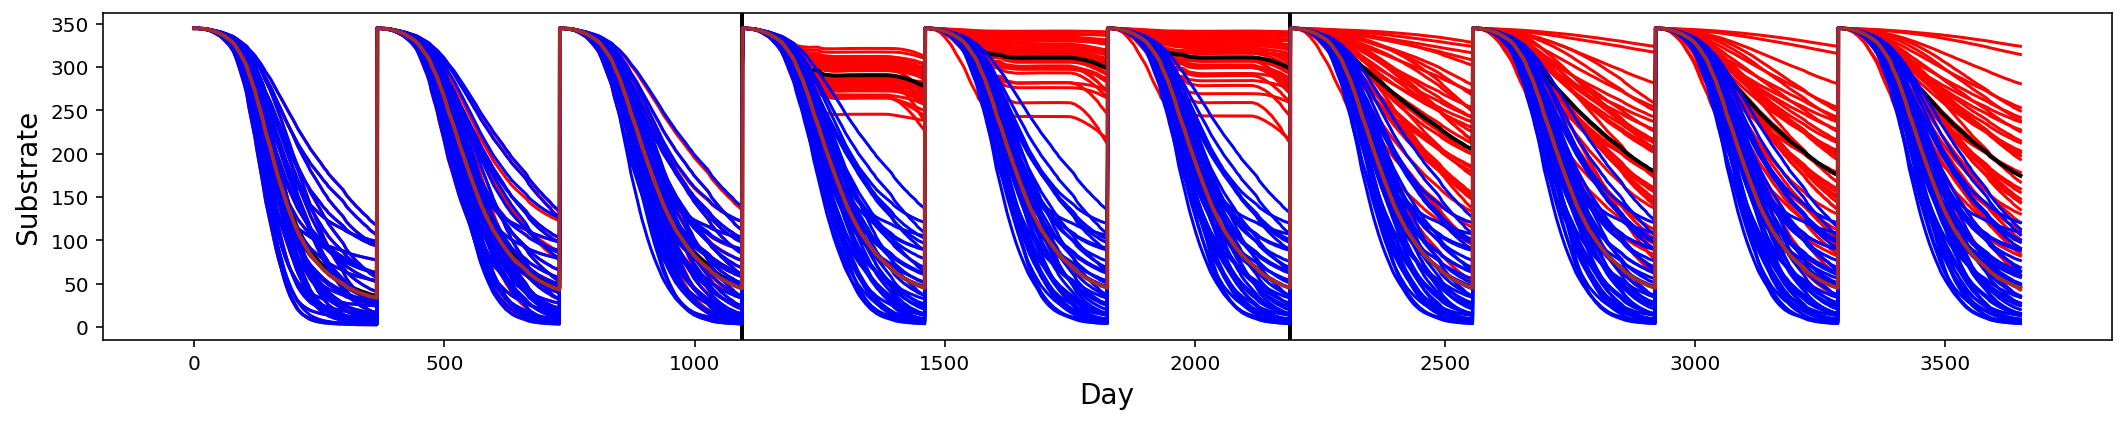

In [16]:
fig,ax = plt.subplots(1,1,figsize=(18,3))
ax.set_xlabel('Day',size=14)
ax.set_ylabel('Substrate',size=14)
ax.axvline(x=365*3, color='k',linestyle='-',lw=2)
ax.axvline(x=365*6, color='k',linestyle='-',lw=2)

for replicate in range(sub_basex15.shape[1]):
    ax.plot(sub_basex15.iloc[:,replicate],color='red')
ax.plot(sub_basex15.mean(axis=1),color='black',lw=2)

#base
for replicate in range(sub_base.shape[1]):
    ax.plot(sub_base.iloc[:,replicate],color='blue')
ax.plot(sub_base.mean(axis=1),color='brown',lw=2)

plt.show()

## basex15_dis

In [17]:
sub_basex15_dis = pd.read_csv('Sub_basex15_dis.csv',index_col=0)
sub_basex15_dis.head()

20201      20202      20204      20205      20206      20208  \
0  3445584.0  3445584.0  3445584.0  3445584.0  3445584.0  3445584.0   
1  3445634.5  3445627.5  3445631.5  3445622.5  3445630.5  3445645.2   
2  3445597.8  3445602.8  3445604.5  3445605.0  3445622.5  3445623.5   
3  3445488.0  3445517.2  3445505.8  3445531.8  3445583.8  3445551.2   
4  3445289.0  3445350.0  3445326.8  3445402.0  3445465.8  3445404.5   

       20209     202010     202011     202012  ...     202018     202019  \
0  3445584.0  3445584.0  3445584.0  3445584.0  ...  3445584.0  3445584.0   
1  3445633.5  3445621.5  3445624.5  3445626.5  ...  3445638.2  3445631.5   
2  3445603.8  3445576.0  3445615.2  3445618.5  ...  3445614.0  3445588.5   
3  3445516.0  3445475.2  3445558.0  3445567.8  ...  3445549.2  3445496.2   
4  3445356.5  3445283.2  3445452.5  3445462.2  ...  3445421.2  3445302.8   

      202021     202025     202026     202028     202031     202032  \
0  3445584.0  3445584.0  3445584.0  3445584.0  3445584.0  3445584.0   
1  3445624.5  3445639.2  3445636.2  3445632.5  3445627.5  3445626.5   
2  3445616.8  3445610.2  3445605.5  3445610.8  3445616.8  3445603.5   
3  3445552.2  3445526.8  3445549.5  3445541.0  3445551.0  3445523.8   
4  3445433.5  3445370.5  3445424.5  3445393.0  3445421.2  3445378.2   

      202033     202035  
0  3445584.0  3445584.0  
1  3445625.5  3445633.2  
2  3445605.5  3445606.2  
3  3445533.2  3445517.0  
4  3445379.8  3445342.2  

[5 rows x 23 columns]

In [18]:
sub_basex15_dis = sub_basex15_dis/10000
sub_basex15_dis.head()

20201      20202      20204      20205      20206      20208  \
0  344.55840  344.55840  344.55840  344.55840  344.55840  344.55840   
1  344.56345  344.56275  344.56315  344.56225  344.56305  344.56452   
2  344.55978  344.56028  344.56045  344.56050  344.56225  344.56235   
3  344.54880  344.55172  344.55058  344.55318  344.55838  344.55512   
4  344.52890  344.53500  344.53268  344.54020  344.54658  344.54045   

       20209     202010     202011     202012  ...     202018     202019  \
0  344.55840  344.55840  344.55840  344.55840  ...  344.55840  344.55840   
1  344.56335  344.56215  344.56245  344.56265  ...  344.56382  344.56315   
2  344.56038  344.55760  344.56152  344.56185  ...  344.56140  344.55885   
3  344.55160  344.54752  344.55580  344.55678  ...  344.55492  344.54962   
4  344.53565  344.52832  344.54525  344.54622  ...  344.54212  344.53028   

      202021     202025     202026     202028     202031     202032  \
0  344.55840  344.55840  344.55840  344.55840  344.55840  344.55840   
1  344.56245  344.56392  344.56362  344.56325  344.56275  344.56265   
2  344.56168  344.56102  344.56055  344.56108  344.56168  344.56035   
3  344.55522  344.55268  344.55495  344.55410  344.55510  344.55238   
4  344.54335  344.53705  344.54245  344.53930  344.54212  344.53782   

      202033     202035  
0  344.55840  344.55840  
1  344.56255  344.56332  
2  344.56055  344.56062  
3  344.55332  344.55170  
4  344.53798  344.53422  

[5 rows x 23 columns]

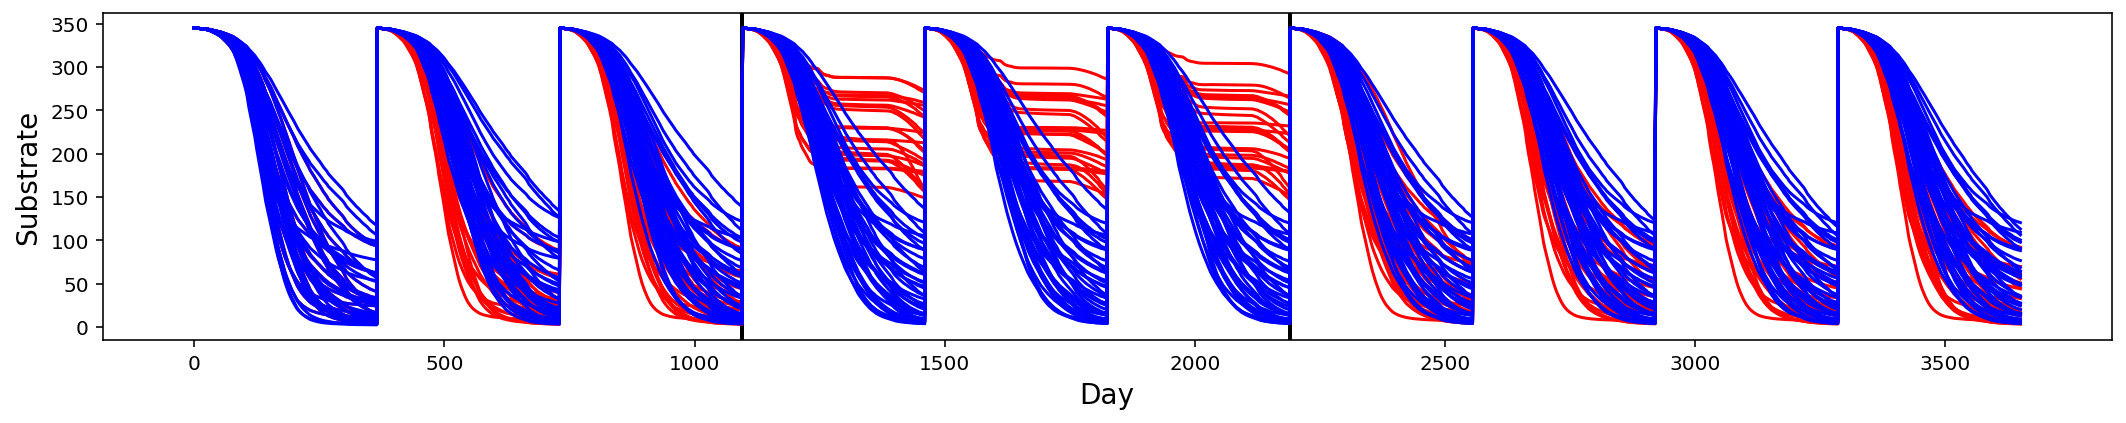

In [22]:
fig,ax = plt.subplots(1,1,figsize=(18,3))
ax.set_xlabel('Day',size=14)
ax.set_ylabel('Substrate',size=14)
ax.axvline(x=365*3, color='k',linestyle='-',lw=2)
ax.axvline(x=365*6, color='k',linestyle='-',lw=2)

for replicate in range(sub_basex15_dis.shape[1]):
    ax.plot(sub_basex10_dis.iloc[:,replicate],color='red')
#ax.plot(sub_basex10_dis.mean(axis=1),color='black',lw=2)

#base
for replicate in range(sub_base.shape[1]):
    ax.plot(sub_base.iloc[:,replicate],color='blue')
#ax.plot(sub_base.mean(axis=1),color='brown',lw=2)

plt.show()

## basex20

In [22]:
sub_basex20 = pd.read_csv('Sub_basex20.csv',index_col=0)
sub_basex20.head()

20201      20202      20203      20204      20205      20206  \
0  3445584.0  3445584.0  3445584.0  3445584.0  3445584.0  3445584.0   
1  3445634.5  3445627.5  3445627.5  3445631.5  3445622.5  3445630.5   
2  3445597.8  3445602.8  3445590.8  3445604.5  3445605.0  3445622.5   
3  3445488.0  3445517.2  3445496.8  3445505.8  3445531.8  3445583.8   
4  3445289.0  3445350.0  3445310.0  3445326.8  3445402.0  3445465.8   

       20207      20208      20209     202010  ...     202031     202032  \
0  3445584.0  3445584.0  3445584.0  3445584.0  ...  3445584.0  3445584.0   
1  3445639.2  3445645.2  3445633.5  3445621.5  ...  3445627.5  3445626.5   
2  3445623.0  3445623.5  3445603.8  3445576.0  ...  3445616.8  3445603.5   
3  3445558.8  3445551.2  3445516.0  3445475.2  ...  3445551.0  3445523.8   
4  3445426.0  3445404.5  3445356.5  3445283.2  ...  3445421.2  3445378.2   

      202033     202034     202035     202036     202037     202038  \
0  3445584.0  3445584.0  3445584.0  3445584.0  3445584.0  3445584.0   
1  3445625.5  3445618.8  3445633.2  3445642.2  3445634.5  3445626.5   
2  3445605.5  3445601.2  3445606.2  3445612.5  3445619.0  3445615.8   
3  3445533.2  3445540.5  3445517.0  3445544.2  3445558.2  3445564.5   
4  3445379.8  3445427.2  3445342.2  3445392.0  3445429.2  3445447.5   

      202039     202040  
0  3445584.0  3445584.0  
1  3445628.5  3445637.5  
2  3445609.2  3445596.2  
3  3445540.0  3445497.0  
4  3445392.0  3445296.0  

[5 rows x 40 columns]

In [23]:
sub_basex20 = sub_basex20/10000
sub_basex20.head()

20201      20202      20203      20204      20205      20206  \
0  344.55840  344.55840  344.55840  344.55840  344.55840  344.55840   
1  344.56345  344.56275  344.56275  344.56315  344.56225  344.56305   
2  344.55978  344.56028  344.55908  344.56045  344.56050  344.56225   
3  344.54880  344.55172  344.54968  344.55058  344.55318  344.55838   
4  344.52890  344.53500  344.53100  344.53268  344.54020  344.54658   

       20207      20208      20209     202010  ...     202031     202032  \
0  344.55840  344.55840  344.55840  344.55840  ...  344.55840  344.55840   
1  344.56392  344.56452  344.56335  344.56215  ...  344.56275  344.56265   
2  344.56230  344.56235  344.56038  344.55760  ...  344.56168  344.56035   
3  344.55588  344.55512  344.55160  344.54752  ...  344.55510  344.55238   
4  344.54260  344.54045  344.53565  344.52832  ...  344.54212  344.53782   

      202033     202034     202035     202036     202037     202038  \
0  344.55840  344.55840  344.55840  344.55840  344.55840  344.55840   
1  344.56255  344.56188  344.56332  344.56422  344.56345  344.56265   
2  344.56055  344.56012  344.56062  344.56125  344.56190  344.56158   
3  344.55332  344.55405  344.55170  344.55442  344.55582  344.55645   
4  344.53798  344.54272  344.53422  344.53920  344.54292  344.54475   

      202039     202040  
0  344.55840  344.55840  
1  344.56285  344.56375  
2  344.56092  344.55962  
3  344.55400  344.54970  
4  344.53920  344.52960  

[5 rows x 40 columns]

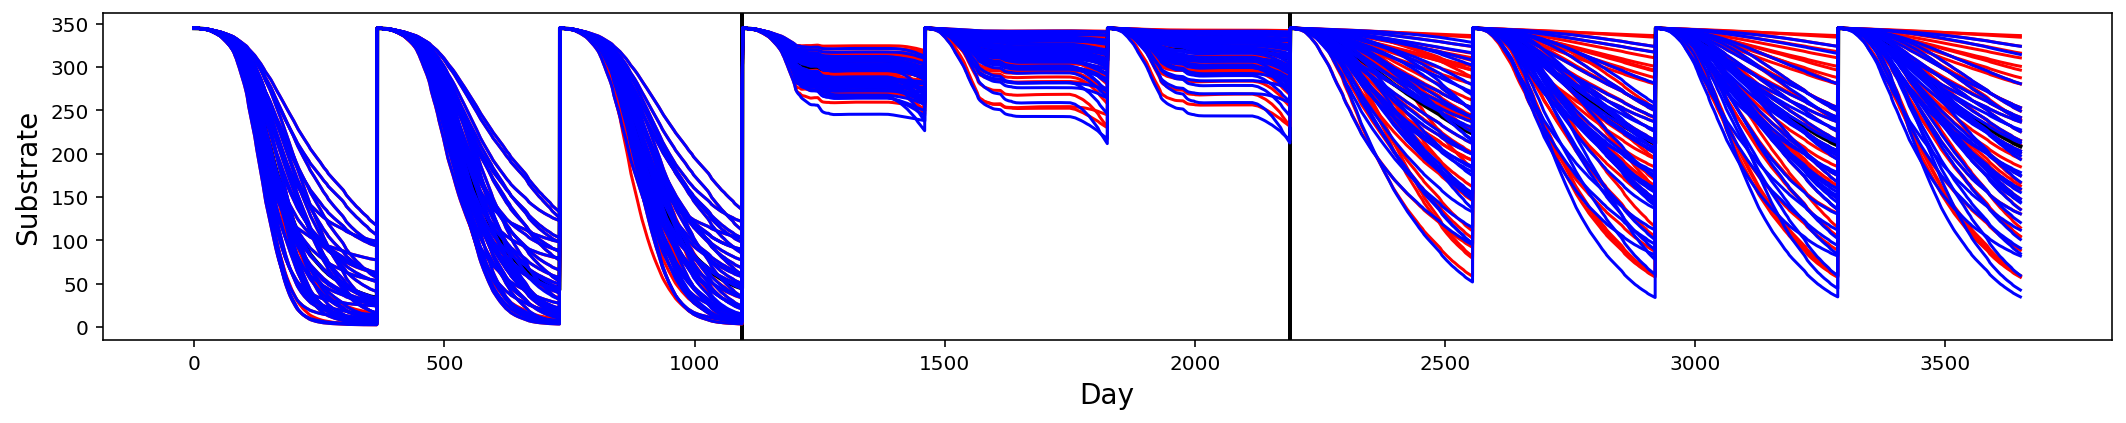

In [24]:
fig,ax = plt.subplots(1,1,figsize=(18,3))
ax.set_xlabel('Day',size=14)
ax.set_ylabel('Substrate',size=14)
ax.axvline(x=365*3, color='k',linestyle='-',lw=2)
ax.axvline(x=365*6, color='k',linestyle='-',lw=2)

for replicate in range(sub_basex20.shape[1]):
    ax.plot(sub_basex20.iloc[:,replicate],color='red')
ax.plot(sub_basex20.mean(axis=1),color='black',lw=2)

#base
for replicate in range(sub_basex15.shape[1]):
    ax.plot(sub_basex15.iloc[:,replicate],color='blue')
#ax.plot(sub_base.mean(axis=1),color='brown',lw=2)

plt.show()

## Combination

In [87]:
fig,ax = plt.subplots(1,1,figsize=(18,3))
ax.set_xlabel('Day',size=14)
ax.set_ylabel('Substrate',size=14)
ax.axvline(x=365*3, color='k',linestyle='-',lw=3)
ax.axvline(x=365*6, color='k',linestyle='-',lw=3)

#base
for replicate1 in range(sub_base.shape[1]):
    ax.plot(sub_base.iloc[:,replicate1],color='blue')
    
#
for replicate2 in range(sub_basex2.shape[1]):
    ax.plot(sub_basex2.iloc[:,replicate2],color='orange',alpha=0.8)

#
for replicate3 in range(sub_basex15.shape[1]):
    ax.plot(sub_basex15.iloc[:,replicate3],color='red',alpha=0.5)

#
#for replicate4 in range(sub_basex20.shape[1]):
#    ax.plot(sub_basex20.iloc[:,replicate4],color='red',alpha=0.5)


plt.show()

## Re-assembled Dataset of Year 3, 6, & 9

### Visualization 1

In [113]:
index_3   = [i for i in range(365*2+1,365*3+1)]
index_6   = [i for i in range(365*5+1,365*6+1)]
index_9   = [i for i in range(365*8+1,365*9+1)]
index_369 = index_3 + index_6 + index_9

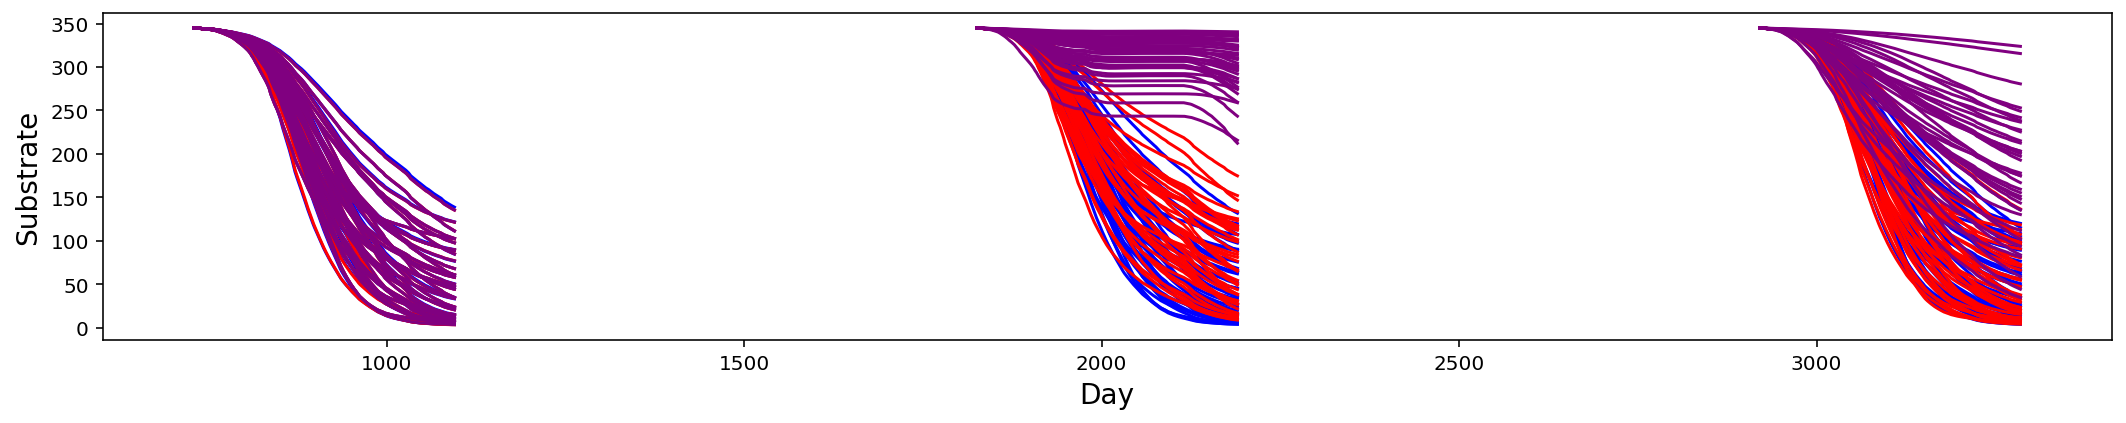

In [114]:
fig,ax = plt.subplots(1,1,figsize=(18,3))
ax.set_xlabel('Day',size=14)
ax.set_ylabel('Substrate',size=14)
#ax.axvline(x=365*3, color='k',linestyle='-',lw=2)
#ax.axvline(x=365*6, color='k',linestyle='-',lw=2)


for replicate1 in range(sub_base.shape[1]):
    ax.plot(sub_base.iloc[index_3,replicate1],color='blue')
    ax.plot(sub_base.iloc[index_6,replicate1],color='blue')
    ax.plot(sub_base.iloc[index_9,replicate1],color='blue')
    
for replicate2 in range(sub_basex2.shape[1]):
    ax.plot(sub_basex2.iloc[index_3,replicate2],color='red')
    ax.plot(sub_basex2.iloc[index_6,replicate2],color='red')
    ax.plot(sub_basex2.iloc[index_9,replicate2],color='red')
    
    
for replicate15 in range(sub_basex15.shape[1]):
    ax.plot(sub_basex15.iloc[index_3,replicate15],color='purple')
    ax.plot(sub_basex15.iloc[index_6,replicate15],color='purple')
    ax.plot(sub_basex15.iloc[index_9,replicate15],color='purple')

### Visualization 2

**Make the 3 Years stick together**

In [115]:
sub_base369    = sub_base.iloc[index_369,:].reset_index(drop=True)
sub_basex2369  = sub_basex2.iloc[index_369,:].reset_index(drop=True)
sub_basex10369 = sub_basex10.iloc[index_369,:].reset_index(drop=True)

sub_basex10_dis369 = sub_basex10_dis.iloc[index_369,:].reset_index(drop=True) # cumulative initialization

sub_basex15369 = sub_basex15.iloc[index_369,:].reset_index(drop=True)
sub_basex20369 = sub_basex20.iloc[index_369,:].reset_index(drop=True)

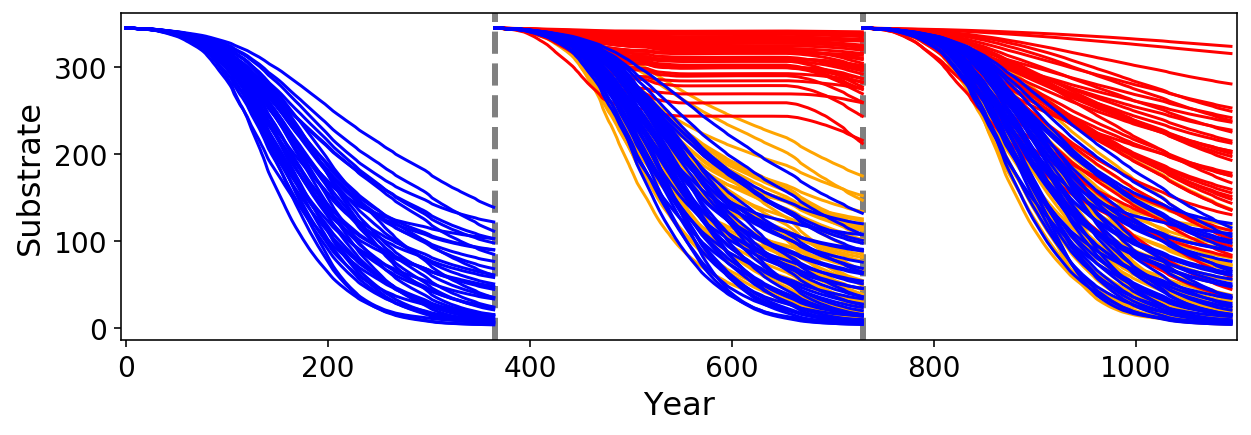

In [116]:
fig,ax = plt.subplots(1,1,figsize=(10,3))
ax.set_xlabel('Year',size=16)
ax.set_ylabel('Substrate',size=16)
ax.axvline(x=365*1, color='grey',linestyle='--',lw=3)
ax.axvline(x=365*2, color='grey',linestyle='--',lw=3)
ax.set_xlim(-5,365*3+5)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)


for replicate in range(sub_basex2369.shape[1]):
    #ax.plot(sub_basex2369.iloc[0:365*1,replicate],   color='yellow')
    ax.plot(sub_basex2369.iloc[365*1:365*2,replicate],color='orange')
    ax.plot(sub_basex2369.iloc[365*2:365*3,replicate],color='orange')
    
for replicate in range(sub_basex15369.shape[1]):
    #ax.plot(sub_basex15369.iloc[0:365*1,replicate],   color='red')
    ax.plot(sub_basex15369.iloc[365*1:365*2,replicate],color='red')
    ax.plot(sub_basex15369.iloc[365*2:365*3,replicate],color='red')

for replicate in range(sub_base369.shape[1]):
    ax.plot(sub_base369.iloc[0:365*1,    replicate],color='blue')
    ax.plot(sub_base369.iloc[365*1:365*2,replicate],color='blue')
    ax.plot(sub_base369.iloc[365*2:365*3,replicate],color='blue')

plt.show()

## re-sample data

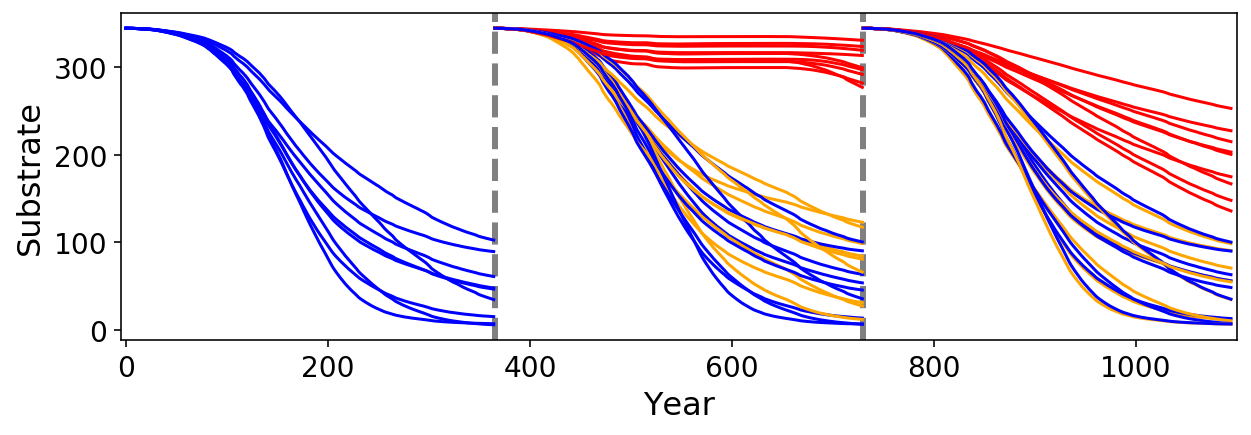

In [92]:
fig,ax = plt.subplots(1,1,figsize=(10,3))
ax.set_xlabel('Year',size=16)
ax.set_ylabel('Substrate',size=16)
ax.axvline(x=365*1, color='grey',linestyle='--',lw=3)
ax.axvline(x=365*2, color='grey',linestyle='--',lw=3)
ax.set_xlim(-5,365*3+5)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)


for replicate in [0,3,4,6,8,9,10,11,12]:
    #ax.plot(sub_basex2369.iloc[0:365*1,replicate],   color='yellow')
    ax.plot(sub_basex2369.iloc[365*1:365*2,replicate],color='orange')
    ax.plot(sub_basex2369.iloc[365*2:365*3,replicate],color='orange')
    

    #ax.plot(sub_basex15369.iloc[0:365*1,replicate],   color='red')
    ax.plot(sub_basex15369.iloc[365*1:365*2,replicate],color='red')
    ax.plot(sub_basex15369.iloc[365*2:365*3,replicate],color='red')


    ax.plot(sub_base369.iloc[0:365*1,    replicate],color='blue')
    ax.plot(sub_base369.iloc[365*1:365*2,replicate],color='blue')
    ax.plot(sub_base369.iloc[365*2:365*3,replicate],color='blue')

plt.show()

#### Define Function of Confidence Interval

In [117]:
def confi_interval(df):
    alpha = 0.10
    
    lower = df.apply(
        lambda df: df.mean() - (stats.t.ppf(1 - alpha/2, df.count()-1) * df.std(ddof=1)/np.sqrt(df.count())),axis=1
    )
    upper = df.apply(lambda df: df.mean() + (stats.t.ppf(1 - alpha/2, df.count()-1) * df.std(ddof=1)/np.sqrt(df.count())),axis=1)
    
    return lower,upper

In [118]:
#replicate = [0,3,4,6,8,9,10,11,12]

bound369    = confi_interval(sub_base369.iloc[:,:])
boundx2369  = confi_interval(sub_basex2369.iloc[:,:])
boundx10369 = confi_interval(sub_basex10369.iloc[:,:])

boundx10_dis369 = confi_interval(sub_basex10_dis369.iloc[:,:]) # cumulative initialization

boundx15369 = confi_interval(sub_basex15369.iloc[:,:])
boundx20369 = confi_interval(sub_basex20369.iloc[:,:])

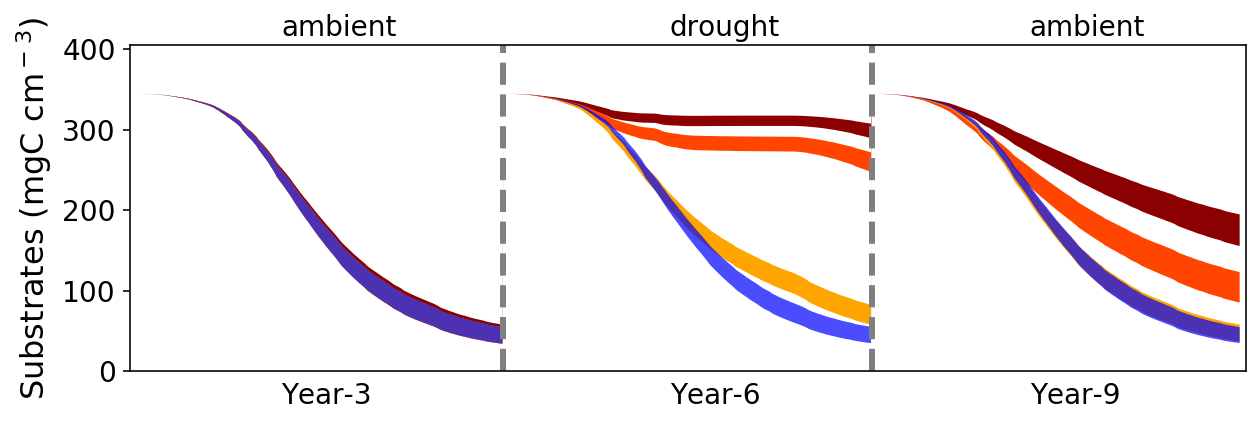

In [120]:
fig,ax = plt.subplots(1,1,figsize=(10,3))
ax.axvline(x=365*1, color='grey',linestyle='--',lw=3)
ax.axvline(x=365*2, color='grey',linestyle='--',lw=3)
ax.set_xlim(-5,365*3+5)
ax.set_ylim(0,400+5)

ax.tick_params(bottom=False,labelbottom=False)    
#ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

#ax.set_xlabel('Year',size=16)
ax.set_ylabel("Substrates (mgC cm$^-$$^3$)",size=16,weight='normal', color='k')
plt.figtext(0.23,0.05,'Year-3',fontsize=14)
plt.figtext(0.50,0.05,'Year-6',fontsize=14)
plt.figtext(0.75,0.05,'Year-9',fontsize=14)

plt.figtext(0.23,0.9,'ambient',fontsize=14)
plt.figtext(0.50,0.9,'drought',fontsize=14)
plt.figtext(0.75,0.9,'ambient',fontsize=14)

# for replicate in [0,3,4,6,8,9,10,11,12]:
#     #ax.plot(sub_basex2369.iloc[0:365*1,replicate],   color='yellow')
#     ax.plot(sub_basex2369.iloc[365*1:365*2,replicate],color='orange')
#     ax.plot(sub_basex2369.iloc[365*2:365*3,replicate],color='orange')
    

#     #ax.plot(sub_basex15369.iloc[0:365*1,replicate],   color='red')
#     ax.plot(sub_basex15369.iloc[365*1:365*2,replicate],color='red')
#     ax.plot(sub_basex15369.iloc[365*2:365*3,replicate],color='red')


#     ax.plot(sub_base369.iloc[0:365*1,    replicate],color='blue')
#     ax.plot(sub_base369.iloc[365*1:365*2,replicate],color='blue')
#     ax.plot(sub_base369.iloc[365*2:365*3,replicate],color='blue')

#ax.fill_between(x=sub_basex20369.index,y1=boundx20369[0],y2=boundx20369[1], facecolor='red',    alpha=1.0)

ax.fill_between(x=sub_basex15369.index,y1=boundx15369[0],y2=boundx15369[1], facecolor='darkred',  alpha=1.0)

#ax.fill_between(x=sub_basex10_dis369.index,y1=boundx10_dis369[0],y2=boundx10_dis369[1], facecolor='grey',alpha=1.0)

ax.fill_between(x=sub_basex10369.index,y1=boundx10369[0],y2=boundx10369[1], facecolor='orangered',alpha=1.0)

ax.fill_between(x=sub_basex2369.index, y1=boundx2369[0], y2=boundx2369[1],  facecolor='orange', alpha=1.0)
ax.fill_between(x=sub_base369.index,   y1=bound369[0],   y2=bound369[1],    facecolor='blue',   alpha=0.7) 

#ax.legend()

plt.savefig('legacy_sub.pdf',bbox_inches='tight')

plt.show()